In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact, FloatSlider

## Power Function Visualization (Normal Distribution Example)

In [4]:
def plot_power_function(mu0=0, alpha=0.05, effect_size=1, n=30, sigma=1):
    mu_values = np.linspace(mu0 - 3, mu0 + 3, 100)
    z_alpha = norm.ppf(1 - alpha)
    power = 1 - norm.cdf(z_alpha + (mu0 - mu_values) * np.sqrt(n)/sigma)
    
    plt.figure(figsize=(10, 6))
    plt.plot(mu_values, power, lw=2)
    
    # Highlight regions
    h0_mask = mu_values <= mu0
    plt.fill_between(mu_values[h0_mask], power[h0_mask], color='red', alpha=0.3, label='H₀: μ ≤ μ₀')
    plt.fill_between(mu_values[~h0_mask], power[~h0_mask], color='green', alpha=0.3, label='H₁: μ > μ₀')
    
    # Annotate size and current effect
    plt.axvline(mu0, color='k', linestyle='--', label='μ₀')
    plt.axhline(alpha, color='red', linestyle=':', label=f'Size α={alpha}')
    plt.axvline(mu0 + effect_size, color='blue', linestyle='--', label='True μ')
    plt.title(f'Power Function W(μ) (n={n}, σ={sigma})')
    plt.xlabel('True Mean μ')
    plt.ylabel('Probability of Rejecting H₀')
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

interact(plot_power_function,
         mu0=FloatSlider(min=-2, max=2, value=0),
         alpha=FloatSlider(min=0.01, max=0.5, value=0.05, step=0.01),
         effect_size=FloatSlider(min=0, max=3, value=1, step=0.1),
         n=FloatSlider(min=10, max=100, value=30),
         sigma=FloatSlider(min=0.5, max=2, value=1));

interactive(children=(FloatSlider(value=0.0, description='mu0', max=2.0, min=-2.0), FloatSlider(value=0.05, de…

## 2. UMP Test Visualization (Critical Regions)

In [5]:
def plot_ump_comparison(mu0=0, mu1=1, alpha=0.05, n=30, sigma=1):
    z_alpha = norm.ppf(1 - alpha)
    critical_value = mu0 + z_alpha * sigma/np.sqrt(n)
    
    # Generate sampling distributions
    x = np.linspace(mu0 - 3*sigma/np.sqrt(n), mu1 + 3*sigma/np.sqrt(n), 200)
    dist_h0 = norm.pdf(x, loc=mu0, scale=sigma/np.sqrt(n))
    dist_h1 = norm.pdf(x, loc=mu1, scale=sigma/np.sqrt(n))
    
    plt.figure(figsize=(10, 6))
    
    # Plot distributions
    plt.plot(x, dist_h0, label='Sampling Distribution under H₀')
    plt.plot(x, dist_h1, label='Sampling Distribution under H₁')
    
    # Shade critical region
    rejection_region = x[x > critical_value]
    plt.fill_between(rejection_region, 0, norm.pdf(rejection_region, mu0, sigma/np.sqrt(n)), 
                     color='red', alpha=0.3, label='Critical Region')
    
    # Calculate and display key metrics
    power = 1 - norm.cdf(critical_value, loc=mu1, scale=sigma/np.sqrt(n))
    plt.title(f'UMP Test Visualization\nPower at μ={mu1}: {power:.2f}')
    plt.axvline(critical_value, color='k', linestyle='--', label=f'Critical Value ({critical_value:.2f})')
    plt.legend()
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.show()

interact(plot_ump_comparison,
         mu0=FloatSlider(min=-2, max=2, value=0),
         mu1=FloatSlider(min=0, max=3, value=1),
         alpha=FloatSlider(min=0.01, max=0.3, value=0.05),
         n=FloatSlider(min=10, max=100, value=30),
         sigma=FloatSlider(min=0.5, max=2, value=1));

interactive(children=(FloatSlider(value=0.0, description='mu0', max=2.0, min=-2.0), FloatSlider(value=1.0, des…

In [6]:
def plot_likelihood_ratio(mu0=0, observed_mean=1, n=30, sigma=1):
    mu_values = np.linspace(mu0 - 2, mu0 + 2, 100)
    
    # Calculate likelihoods
    likelihood_h0 = np.max([norm.pdf(observed_mean, loc=mu, scale=sigma/np.sqrt(n)) 
                          for mu in mu_values if mu <= mu0])
    likelihood_h1 = np.max([norm.pdf(observed_mean, loc=mu, scale=sigma/np.sqrt(n)) 
                          for mu in mu_values if mu > mu0])
    LR = likelihood_h1 / likelihood_h0
    
    # Plot likelihood functions
    plt.figure(figsize=(10, 6))
    plt.plot(mu_values, [norm.pdf(observed_mean, loc=mu, scale=sigma/np.sqrt(n)) 
                        for mu in mu_values], label='Likelihood Function')
    
    # Mark maxima
    plt.scatter(mu0, likelihood_h0, color='red', s=100, label='Max under H₀')
    plt.scatter(mu_values[-1], likelihood_h1, color='green', s=100, label='Max under H₁')
    
    plt.title(f'Likelihood Ratio Test\nΛ = {LR:.2f}')
    plt.axvline(mu0, color='k', linestyle='--', label='μ₀')
    plt.xlabel('μ')
    plt.ylabel('Likelihood')
    plt.legend()
    plt.show()

interact(plot_likelihood_ratio,
         mu0=FloatSlider(min=-1, max=1, value=0),
         observed_mean=FloatSlider(min=-1, max=2, value=1),
         n=FloatSlider(min=10, max=100, value=30),
         sigma=FloatSlider(min=0.5, max=2, value=1));

interactive(children=(FloatSlider(value=0.0, description='mu0', max=1.0, min=-1.0), FloatSlider(value=1.0, des…

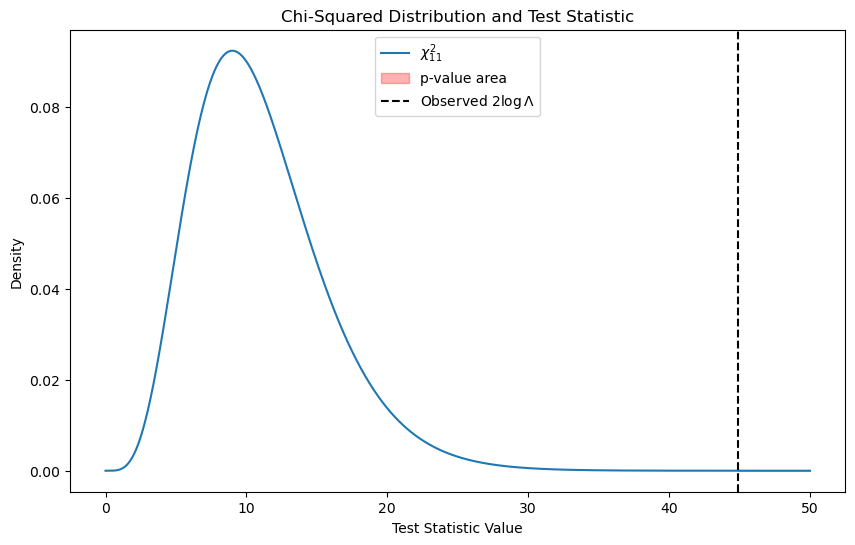

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Test statistic and chi-squared distribution
df = 11
x = np.linspace(0, 50, 1000)
chi2_pdf = chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, chi2_pdf, label=f'$\chi^2_{{11}}$')
plt.fill_between(x[x > 44.86], chi2_pdf[x > 44.86], color='red', alpha=0.3, label='p-value area')
plt.axvline(44.86, color='k', linestyle='--', label='Observed $2 \log \Lambda$')
plt.xlabel('Test Statistic Value')
plt.ylabel('Density')
plt.title('Chi-Squared Distribution and Test Statistic')
plt.legend()
plt.show()